In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook',ticks=True, grid=False)

In [2]:
df_eda = pd.read_csv('hotel_bookings.csv')[:5000]

In [3]:
df_eda = df_eda[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
df_eda.head()

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1


In [4]:
df_pre = df_eda.copy() 
# Disini saya lakukan copy untuk nanti bakal dipakai untuk data prediksi. 
#Alasannya biar tidak tercampur jika saya melakukan fillnan 

In [5]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     

# TARGET EDA

    Jalankan Exploratory Data Analysis untuk:
        Memahami profil tamu/konsumen hotel (customer profiling).
        Memahami kebiasaan tamu/konsumen hotel (customer behavior).
    Berikan penjelasan tentang insight yang Anda temukan dari hasil Exploratory Data Analysis ke 
    manajemen hotel!

In [130]:
df_eda[df_eda['distribution_channel'] == 'Corporate']['market_segment'].unique()

array(['Corporate', 'Groups', 'Complementary', 'Direct'], dtype=object)

In [48]:
for i in df_eda.columns:
    print(i,df_eda[i].unique(), df_eda[i].nunique())

hotel ['Resort Hotel'] 1
is_canceled [0 1] 2
adults [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10] 14
children [ 0.  1.  2. 10.] 4
babies [0 1 2] 3
meal ['BB' 'FB' 'HB' 'SC' 'Undefined'] 5
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'] 56
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'] 6
distribution_channel ['Direct' 'Corporate' 'TA/TO'] 3
reserved_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P'] 9
booking_changes [ 3  4  0  1  2  5 17  6] 8
deposit_type ['No Deposit' 'Refundable' 'Non Refund'] 3
days_in_waiting_list [  0  50  47  65 122] 5
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group'] 4
required_car_parking_spaces [0 1 2] 3
to

In [58]:
df_eda['country'].value_counts()[:10]

PRT    3174
ESP     550
GBR     505
IRL     172
FRA     113
DEU      89
NLD      55
CN       33
BEL      29
USA      28
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

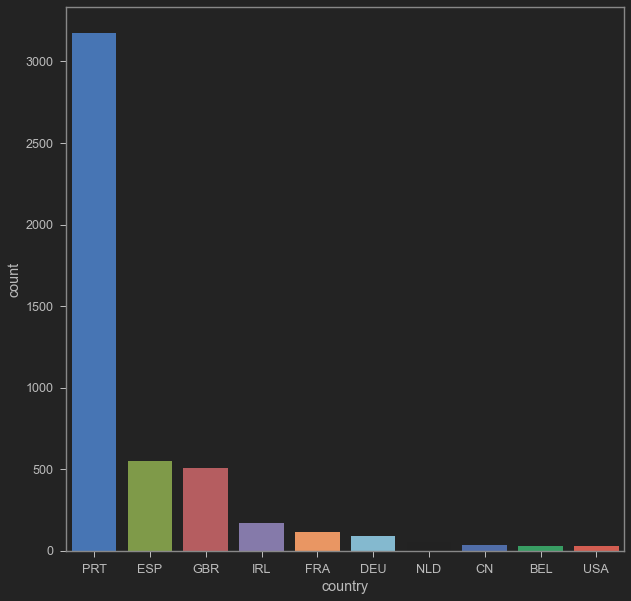

In [57]:
plt.figure(figsize = (10, 10))
sns.countplot(data = df_eda, x = 'country',  order = df_eda['country'].value_counts().index[:10])

Dari graph diatas(yang telah diambil 10 besar terbanyak) menunjukann bahwa pendatang/customer yang melakukan booking paling banyak berasal dari negara PRT(Portugal) diikuti oleh ESP(Spanyol) dan GBR(United Kingdom).

In [78]:
def families(cols):
    if (cols['children'] >= 1) or (cols['babies'] >= 1):
        return 'Yes'
    else :
        return 'No'

df_eda['families'] = df_eda[['children','babies']].apply(families, axis = 1)

In [82]:
df_eda['families'].value_counts()

No     4560
Yes     440
Name: families, dtype: int64

Yang melakukan booking penginapan sekeluarga (Penilaian ini dilakukan dari jika mereka mempunyai anak atau bayi) ada sebanyak 440, perlu ditekankan bahwa value No' tidak mengartikan bahwa mereka tidak berkeluarga tetapi bisa dalam arti lain seperti mereka dalam kunjungan business trip, bersama pasangan, atau bersama teman.

<AxesSubplot:xlabel='market_segment', ylabel='count'>

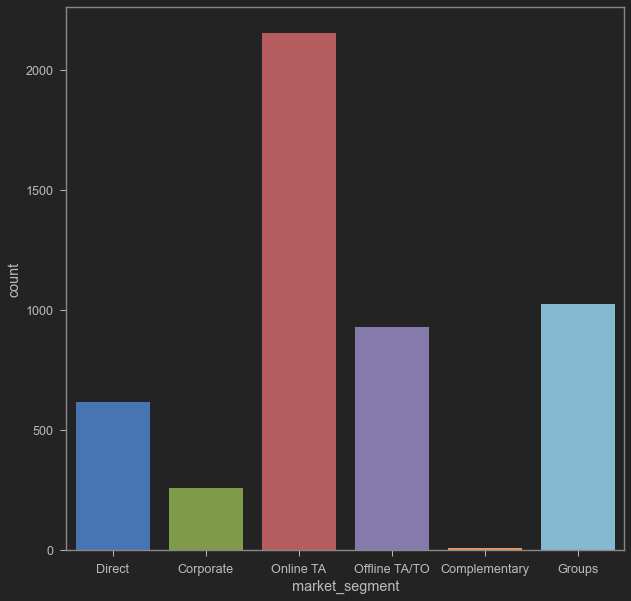

In [83]:
plt.figure(figsize = (10, 10))
sns.countplot(data = df_eda, x = 'market_segment')

Most booking where made by 

Online TA(Travel Agency) followed by 

groups (According to certain articles, groups means his segment of the guests stays at your hotel under contracted rates for a large group or for an event. The rates are flexible depending on the requirements. Usually like Leisure, Business, Conference / Banquet, Incentive, Wedding, Events, Crew

and Offline Travel Agency/Tour Operator

<AxesSubplot:xlabel='meal', ylabel='count'>

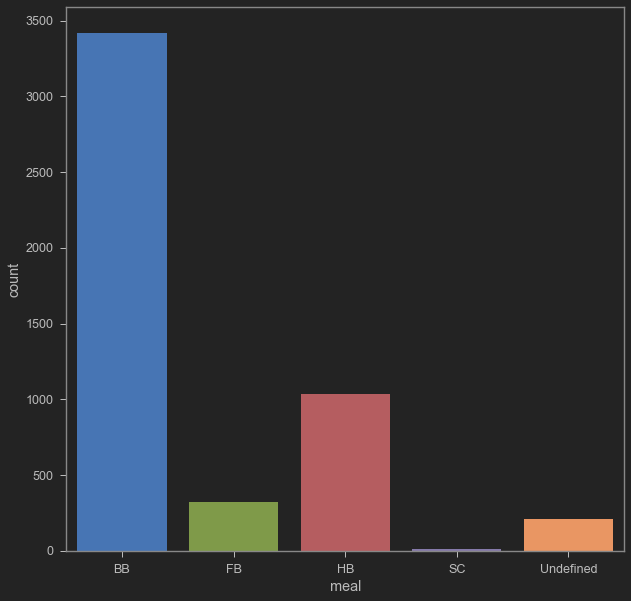

In [84]:
plt.figure(figsize = (10, 10))
sns.countplot(data = df_eda, x = 'meal')

Most of the customers prefer Breakfast meal only, follow by Breakfast and Evening Meals, and last Full Meals.

<AxesSubplot:xlabel='customer_type', ylabel='count'>

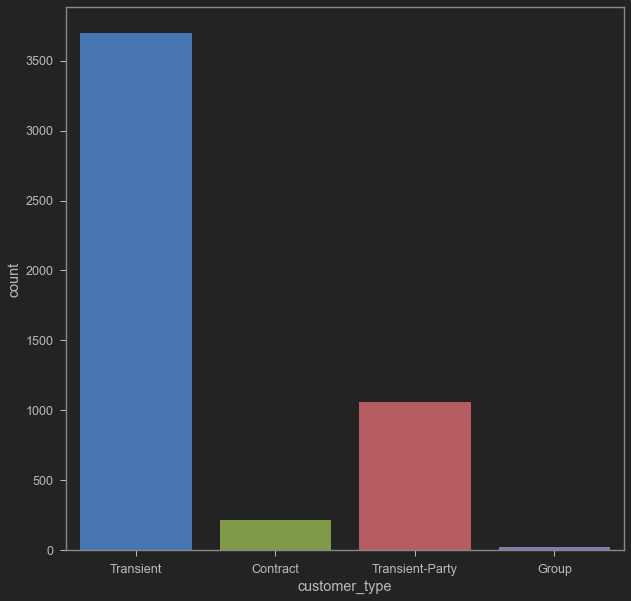

In [93]:
plt.figure(figsize = (10, 10))
sns.countplot(data = df_eda, x = 'customer_type')

Most of the bookings were transient, according to xotels, transient means guests who are predominantly on-the-move and seek short (and often urgent!) hotel-stays which include Walk-in guests, Guests with a last-minute booking, and/or, Simply individual guests requiring a short stay at the hotel

In [99]:
def parking(cols):
    if cols['required_car_parking_spaces'] > 0:
        return 'With Vehicles'
    else:
        return 'No Vehicles'

df_eda['Vehicles'] = df_eda[['required_car_parking_spaces']].apply(parking, axis = 1)

In [101]:
df_eda['Vehicles'].value_counts()

No Vehicles      4533
With Vehicles     467
Name: Vehicles, dtype: int64

Most of the customers doesn't bring their own vehicles but this column is a little bit ambiguous because does Tour Bus include as need parking spaces? or does need parking spaces is just for personal use (they bring their own transport), assuming that tour bus counts as need parking space, then most of the customers ride by taxi or temporary transport

But I have been wondering, by data, which kind of people who usually does booking cancel, and according to my experience, people often cancel their hotel bookings (with the features we have right now) is because the transaction they made is somewhat okay to them to do cancellation, so let's check it out

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

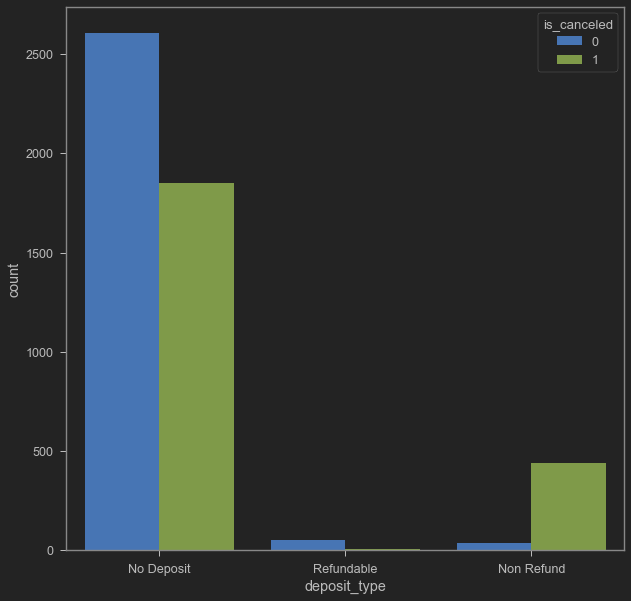

In [103]:
plt.figure(figsize = (10, 10))
sns.countplot(data = df_eda, x = 'deposit_type', hue = 'is_canceled')

According to the graph, most bookings were made with no deposit(which is reasonable because they won't have any risk or consequences if they cancel the booking), while the reason why there's less people who does refundable/non-refund type was because even if they got a refund, usually it is not 100% money back. As for why non-refund cancellation is higher than people who doesn't(which is weird) it might be because the room they book happens to be cheap and they happen to have another urgency which makes them can't stay, to proof this assumption of mine, I will make a graph for non-refund

In [105]:
df_refund = df_eda[df_eda['deposit_type'] == 'Non Refund']
df_refund

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,families,Vehicles
2133,Resort Hotel,1,2,0.0,0,BB,PRT,Groups,TA/TO,A,0,Non Refund,0,Transient,0,0,No,No Vehicles
2134,Resort Hotel,1,2,0.0,0,BB,PRT,Groups,TA/TO,A,0,Non Refund,0,Transient,0,0,No,No Vehicles
2135,Resort Hotel,1,2,0.0,0,BB,PRT,Groups,TA/TO,A,0,Non Refund,0,Transient,0,0,No,No Vehicles
2136,Resort Hotel,1,2,0.0,0,BB,PRT,Groups,TA/TO,A,0,Non Refund,0,Transient,0,0,No,No Vehicles
2141,Resort Hotel,1,2,0.0,0,BB,PRT,Groups,TA/TO,A,0,Non Refund,0,Transient,0,0,No,No Vehicles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0,No,No Vehicles
4996,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0,No,No Vehicles
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0,No,No Vehicles
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0,No,No Vehicles


<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

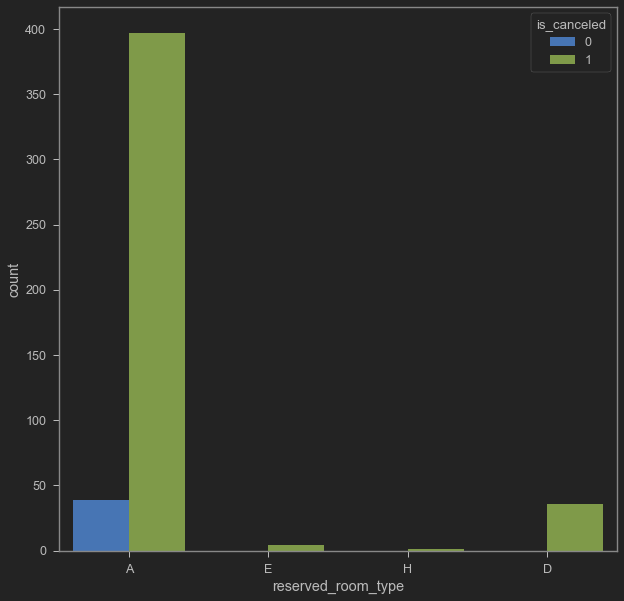

In [106]:
plt.figure(figsize = (10, 10))
sns.countplot(data = df_refund, x = 'reserved_room_type', hue = 'is_canceled')

Assuming that the room A is the cheapest, then my assumption is correct

<AxesSubplot:xlabel='total_of_special_requests', ylabel='count'>

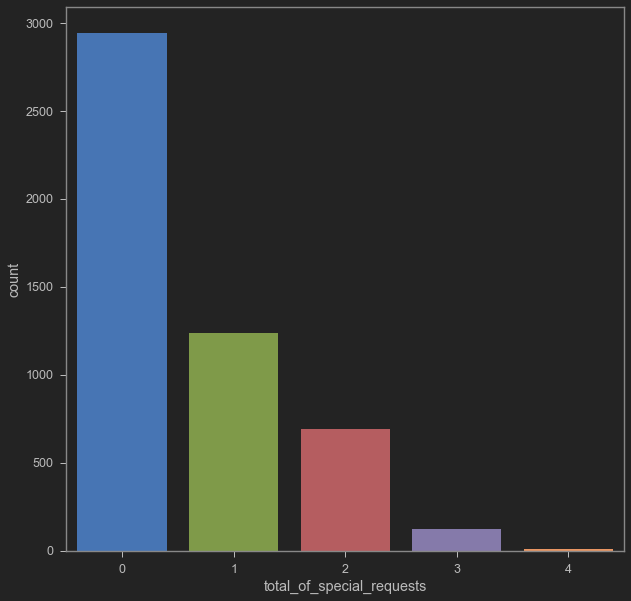

In [115]:
plt.figure(figsize = (10, 10))
sns.countplot(data = df_eda, x = 'total_of_special_requests')

Most of the customers doesn't ask for any special request

In [131]:
len(df_eda[(df_eda['distribution_channel'] == 'Corporate')] )

275

There's around 275 bookings who's on a behalf of business trips (275 doesn't mean they are 275 people, in this 275 bookings, there are people with that goes or or in a group

# Overall Insights based on what I did

Most of customer that made the bookin came from Portugal, followed by Spanyol and United Kingdom

Most of the bookings are from Online Travel Agency

Most of the customer who made the booking prefer breakfast meals only

Most of the books are transient(walk-in,  a short stay or in-short time booking)

Most of the customers come by temporary transport like taxi or train

Most of the bookings where made with no deposit needed, and most people canceled out the booking when it comes non-refund deposit type which is because most of the room they booked are cheap (Room type A)

Most of the customer doesn't ask for any special request

There's 275 bookings that's for business trips 

In [6]:
################################################################################################################################

In [7]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
#feature engineering
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, RobustScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
#evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report, plot_roc_curve, plot_precision_recall_curve

In [8]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hotel                        5000 non-null   object 
 1   is_canceled                  5000 non-null   int64  
 2   adults                       5000 non-null   int64  
 3   children                     5000 non-null   float64
 4   babies                       5000 non-null   int64  
 5   meal                         5000 non-null   object 
 6   country                      4998 non-null   object 
 7   market_segment               5000 non-null   object 
 8   distribution_channel         5000 non-null   object 
 9   reserved_room_type           5000 non-null   object 
 10  booking_changes              5000 non-null   int64  
 11  deposit_type                 5000 non-null   object 
 12  days_in_waiting_list         5000 non-null   int64  
 13  customer_type     


    Target : is_canceled
    Feature Numerik : adults, babies, children, day_in_waiting_list, required_car_parking_space, 
    total_special, booking_changes
    Feature Categorik : hotel, meal, country(contained NaN), market_segment, distribution_channel, 
    reserved_room, deposit_type, customer_type

In [9]:
for i in df_pre.columns:
    print(i,df_pre[i].unique(), df_pre[i].nunique())

hotel ['Resort Hotel'] 1
is_canceled [0 1] 2
adults [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10] 14
children [ 0.  1.  2. 10.] 4
babies [0 1 2] 3
meal ['BB' 'FB' 'HB' 'SC' 'Undefined'] 5
country ['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN'] 56
market_segment ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'] 6
distribution_channel ['Direct' 'Corporate' 'TA/TO'] 3
reserved_room_type ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P'] 9
booking_changes [ 3  4  0  1  2  5 17  6] 8
deposit_type ['No Deposit' 'Refundable' 'Non Refund'] 3
days_in_waiting_list [  0  50  47  65 122] 5
customer_type ['Transient' 'Contract' 'Transient-Party' 'Group'] 4
required_car_parking_spaces [0 1 2] 3
to

For the numeric features, I will let it be first, but as for the categorical features, if the variables are more than 5, then I will use binary encoding, else I'll do one hot and also I will drop the hotel feature because there's only 1 variable, and as for country, because it contains 2 NaN values, I will just fill it with mode/most_frequent

    Feature less than 6 = ['meal','distribution_channel','deposit_type','customer_type']

In [145]:
binary_pipe = Pipeline([
    ('Missing Nan', SimpleImputer(strategy = 'most_frequent')),
    ('Binary Encode', BinaryEncoder())
])

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['meal','distribution_channel','deposit_type','customer_type']),
    ('Binary', binary_pipe, ['country','market_segment','reserved_room_type'])
], remainder = 'passthrough')

Soal nomor 1 : Pilihlah setidaknya 3 model machine learning yang Anda pahami untuk mendapatkan benchmark model ML untuk memprediksi apakah user akan cancel booking atau tidak! Jelaskan secara singkat cara kerja model ML yang Anda gunakan!

    Model yang akan saya gunakan adalah LogisticRegression, KNN, dan DecisionTree.
        LogisticRegression : Based on how significant a certain feature towards its target,
        usually by its P-val and how impactful it is base on its coef
        KNN : Based on its Nearest Neighbours
        Decision Tree : Based on branches, whereas if it less than a certain value, 
        then it goes to back section, else good section

In [11]:
logreg = LogisticRegression(solver = 'liblinear')
tree = DecisionTreeClassifier(random_state = 2021)
knn = KNeighborsClassifier()

In [12]:
x = df_pre.drop(['hotel','is_canceled'], axis = 1)
y = df_pre['is_canceled']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y, random_state = 2021)

Soal no 2 : Ada 2 jenis kesalahan yang mungkin terjadi dalam model ML di studi kasus ini, yaitu:

    Model memprediksi user akan cancel booking (membatalkan pesanan), padahal sebenarnya/realisasinya 
    user tidak membatalkan pesanan.
    Model memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel 
    booking (membatalkan pesanan).
    
a. Pilih jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan dan jelaskan alasan pilihan Anda!

Based on my domain knowledge about businesses, They rather choose the first than the second, which means the 2nd choice is the most impactful towards the the business finance, Why you might ask? Unlike the 2nd choice, yang pertama itu ketika mesin predict cancel tapi actual-nya tidak, the worst case would be the room will be given to someone else who ordered it or happen to walk-in(which is hotel business, people who does walk-in is prioritize). And so what happen to the person who booked the room priors before?? What happen when we came to the hotel and realize the room is being used? Well according to my Experience, hotel will always find a way to provide you a place to stay, they might have a spare room for you or if they happen to be fully booked out, they can send you to another hotel they happen to partnered with (which btw they receive commision by doing so). And also if machine predicts cancel but the person really do came, it doesn't do any harm at all(financial wise). BUT as for the 2nd choice, when the machine predicts not canceled but in actual the person do canceled, it means there's a room that's being on hold(but won't be used because it is canceled) and by doing so, they just lose an opportunity to gain money. The 1st choice might have an impact on the customer who's staying but and again, hotel will always find a way to provide them a place to stay, but as for the 2nd choice, it affect the hotel as in the room could be given to someone else(profit gain) but instead holding it unknowingly that the book is canceled(no profit gain)

b. Pilih evaluation metric yang bisa menekan jenis kesalahan yang Anda pilih! Berikan alasan!

    TP : predict cancel, actual cancel : no room is wasted
    TN : predict not canceled, actual not canceled : room used
    FP : predict cancel, actual not cancel : room booked by the person is given to someone else
    FN : predict not canceled, actual canceled : room is being hold for no reason which lead to 
    no profit gain during that day

I want to prevent FN, so the evaluation metrics I'm going to use is RECALL

In [14]:
def model_evaluation_cv(model):
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)
])
    model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
    return model_cv

In [15]:
def print_result(model_cv):
    print('score : ', model_cv)
    print('mean score : ', model_cv.mean())
    print('std score : ', model_cv.std())

In [16]:
model_cv = model_evaluation_cv(logreg)
print_result(model_cv)

score :  [0.95652174 0.94720497 0.92546584 0.94409938 0.92523364]
mean score :  0.9397051140651304
std score :  0.012413997377058911


In [17]:
model_cv = model_evaluation_cv(tree)
print_result(model_cv)

score :  [0.87267081 0.88819876 0.87267081 0.88198758 0.87850467]
mean score :  0.8788065246415512
std score :  0.005894375395314388


In [18]:
model_cv = model_evaluation_cv(knn)
print_result(model_cv)

score :  [0.90993789 0.91925466 0.92546584 0.90062112 0.90031153]
mean score :  0.9111182059170682
std score :  0.010004226553027872


Secara Evaluasi Cross Validasi : Logreg model terbaik, diikuti dengan knn, dan terakhir tree. Sekarang coba untuk lihat hasil predict

In [19]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print(recall_score(y_test, y_pred))

0.9361393323657474


Datanya balance dan hasilnya tetap bagus, jadi tidak diperlakukan handling imbalance data / resampling

Noted : tau balancenya ketika saya melakukan classification report

Karena model yang paling bagus sejauh ini adalah Logreg, maka akan dicoba untuk improvement model seperti Polynomial dan Scaling

# POLYNOMIAL

In [20]:
binary_pipe = Pipeline([
    ('Missing Nan', SimpleImputer(strategy = 'most_frequent')),
    ('Binary Encode', BinaryEncoder())
])

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['meal','distribution_channel','deposit_type','customer_type']),
    ('Binary', binary_pipe, ['country','market_segment','reserved_room_type']),
    ('Poly', PolynomialFeatures(degree = 4, interaction_only = False, include_bias = False), ['adults', 'children', 'babies', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'])
], remainder = 'passthrough')

In [21]:
def model_evaluation_cv(model):
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)
])
    model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
    return model_cv

In [22]:
model_cv = model_evaluation_cv(logreg)
print_result(model_cv)

score :  [0.99378882 0.98447205 0.99689441 0.99068323 0.99688474]
mean score :  0.9925446489038524
std score :  0.004646212880315894


In [23]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print(recall_score(y_test, y_pred))

0.9912917271407837


Dengan polynomial degree 4, hasilnya meningkat dratis dari 0.936 menjadi 0.991, jika degreenya 3, maka terjadi penurunan drastis atau underfitting, yaitu sebesar 0.05(0.49 ketika crossvalidasi)

Sekarang dicoba jika dilakukan versi scaling, terlebih dahulu saya check jika ada nilai outliers

# SCALING

In [24]:
df_pre.describe()

,is_canceled,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.459600,1.969800,0.115600,0.014800,0.207200,1.772000,0.093800,0.602000
std,0.498415,1.566326,0.444833,0.122409,0.612489,13.545358,0.292948,0.823245
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,55.000000,10.000000,2.000000,17.000000,122.000000,2.000000,4.000000


Dengan table diatas bisa disimpulkan ada beberapa feature yang memiliki outliers seperti children, adults, booking changes dan days_in_waiting_list, maka scaling yang saya gunakan ada robust

In [25]:
binary_pipe = Pipeline([
    ('Missing Nan', SimpleImputer(strategy = 'most_frequent')),
    ('Binary Encode', BinaryEncoder())
])

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['meal','distribution_channel','deposit_type','customer_type']),
    ('Binary', binary_pipe, ['country','market_segment','reserved_room_type']),
    ('Scale', RobustScaler(), ['adults', 'children', 'babies', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'])
], remainder = 'passthrough')

In [26]:
def model_evaluation_cv(model):
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)
])
    model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
    return model_cv

In [27]:
model_cv = model_evaluation_cv(logreg)
print_result(model_cv)

score :  [0.95652174 0.94720497 0.92546584 0.94409938 0.92523364]
mean score :  0.9397051140651304
std score :  0.012413997377058911


In [28]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print(recall_score(y_test, y_pred))

0.9346879535558781


Hasilnya turun sebesar 0.03 jika dilakukan robustscaling (dari 0.936 menjadi 0.934), sekarang mau dicoba jika poly dan scaling dilakukan bersama

# POLY THEN SCALING

In [29]:
binary_pipe = Pipeline([
    ('Missing Nan', SimpleImputer(strategy = 'most_frequent')),
    ('Binary Encode', BinaryEncoder())
])

poly_scale_pipe = Pipeline([
    ('Polynomial', PolynomialFeatures(degree = 3, interaction_only = False, include_bias = False)),
    ('Scaling', RobustScaler())
]) #Alasan kenapa saya poly dulu baru scaling, karena pernah baca sebuah article bahwa 
#sebaiknya dibuat polynomial feature dulu baru di scaling

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['meal','distribution_channel','deposit_type','customer_type']),
    ('Binary', binary_pipe, ['country','market_segment','reserved_room_type']),
    ('Poly', poly_scale_pipe, ['adults', 'children', 'babies', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'])
], remainder = 'passthrough')

In [30]:
def model_evaluation_cv(model):
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
    ('preprocess', transformer),
    ('model', model)
])
    model_cv = cross_val_score(estimator, x_train, y_train, scoring = 'recall', cv = skfold)
    return model_cv

In [31]:
model_cv = model_evaluation_cv(logreg)
print_result(model_cv)

score :  [0.48447205 0.38819876 0.21118012 0.26708075 0.3894081 ]
mean score :  0.3480679553414214
std score :  0.09718309758832536


In [32]:
estimator = Pipeline([
    ('transformer', transformer),
    ('model', logreg)])
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
print(recall_score(y_test, y_pred))

0.8737300435413643


Setelah dilakukan beberapa test terhadap degreenya, yang paling bagus adalah degree 3 dimana nilai crossvalidasi adalah 0.34 tapi setelah di lakukan test predict, nilainya naik ke 0.873, walau demikian tidak sebagus ketika dilakukan scaling atau poly sendirian. Oleh karena itu saya akan memakai yang terbaik yaitu polynomial, dan dilakukan hyperparams

# HYPERPARAMS

In [33]:
binary_pipe = Pipeline([
    ('Missing Nan', SimpleImputer(strategy = 'most_frequent')),
    ('Binary Encode', BinaryEncoder())
])

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['meal','distribution_channel','deposit_type','customer_type']),
    ('Binary', binary_pipe, ['country','market_segment','reserved_room_type']),
    ('Poly', PolynomialFeatures(degree = 4, interaction_only = False, include_bias = False), ['adults', 'children', 'babies', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests'])
], remainder = 'passthrough')

In [34]:
estimator = Pipeline([
    ('preprocess', transformer),
    ('model', logreg)
])

In [35]:
estimator[0].transformers[2]

('Poly',
 PolynomialFeatures(degree=4, include_bias=False),
 ['adults',
  'children',
  'babies',
  'booking_changes',
  'days_in_waiting_list',
  'required_car_parking_spaces',
  'total_of_special_requests'])

In [36]:
hyperparam_space =[
    {'model__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'model__C' : [100, 10, 1, 0.1, 0.01, 0.001],
    'preprocess__Poly__degree' : [2, 3, 4, 5]}
]

In [37]:
skfold = StratifiedKFold(n_splits = 5)
grid_search = GridSearchCV(estimator, param_grid = hyperparam_space, cv = skfold, scoring = 'recall', n_jobs = -1)

In [38]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['meal',
                                                                          'distribution_channel',
                                                                          'deposit_type',
                                                                          'customer_type']),
                                                                        ('Binary',
                                                                         Pip

In [39]:
print('best score ', grid_search.best_score_)
print('best score ', grid_search.best_params_)

best score  0.9968944099378882
best score  {'model__C': 100, 'model__solver': 'liblinear', 'preprocess__Poly__degree': 5}


In [40]:
grid_search.best_estimator_.fit(x_train, y_train)
y_pred = grid_search.best_estimator_.predict(x_test)
print(recall_score(y_test, y_pred))

0.9956458635703919


1. Setelah Anda memilih benchmark model terbaik, lakukan hyperparameter tunning untuk meningkatkan preforma model Anda! Parameter apa saja yang anda pilih untuk tunning? Jelaskan maksud dari tiap-tiap parameter tersebut!

        Parameter yang dipilih adalah solver dan C dari parameternya model Logistic Regression, 
        dan degree dan polynomial.
            - Solver adalah parameter logreg dalam menentukan algoritma apa yang mau kita gunakan
            - C adalah parameter logreg yang dari article yang saya baca dulu, untuk mengurangin 
            overfitting
            - Degree adalah parameter pada polynomial, yang dimana angkanya mempresentasikan pangkat 
            persamaan, seperti jika degreenya 2 pada column a dan b, maka featurenya menjadi 
            a, b, a^2, ab, b^2

2. Bagaimana performa model Anda setelah Hyper-parameter Tuning? Apakah ada tahap lanjutan yang bisa Anda lakukan untuk meningkatkan performa model lebih jauh? Buat kesimpulan akhir, model mana yang akan Anda pakai untuk memprediksi apakah user akan cancel booking atau tidak!

    Performanya meningkat dari dari 0.936 logreg biasa, menjadi 0.991 di polynomial hingga menjadi 0.995 setelah dilakukan hyperparameter tuning dengan 'model__C': 100, 'model__solver': 'liblinear', 'preprocess__Poly__degree': 5. 
    
# CONCLUSION

    Model yang digunakan adalah LogisticRegression yang menggunakan polynomial dan telah dilakukan
    hyperparameter tuning untuk mendapatkan parameter terbaik yaitu :
    'model__C': 100 
    'model__solver': 'liblinear' 
    'preprocess__Poly__degree': 5
    Dengan Tingkat akurasi recall sebesar 0.9956458635703919